In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/procrimewithtaswd/ProcessedCrimes1-TASWD.csv


# Preprocess Data

In [2]:
df = pd.read_csv('/kaggle/input/procrimewithtaswd/ProcessedCrimes1-TASWD.csv')
df.drop("Unnamed: 0", axis=1)
df

,Unnamed: 0,Date,Time,Description,Location,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime
0,0,2020-01-08,22:30:00,BATTERY - SIMPLE ASSAULT,1100 W 39TH PL,34.014100,-118.297800,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime
1,1,2020-01-01,03:30:00,BATTERY - SIMPLE ASSAULT,700 S HILL ST,34.045900,-118.254500,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime
2,2,2020-02-13,12:00:00,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,200 E 6TH ST,34.044800,-118.247400,Los Angeles,SEXUAL OFFENCE,No,FELONY,Weekday,Daytime
3,3,2020-01-01,17:30:00,VANDALISM - MISDEAMEANOR ($399 OR UNDER),5400 CORTEEN PL,34.168500,-118.401900,Los Angeles,VANDALISM,No,MISDEMEANOR,Weekday,Daytime
4,4,2020-01-01,04:15:00,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",14400 TITUS ST,34.219800,-118.446800,Los Angeles,VANDALISM,No,FELONY,Weekday,Nighttime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779210,3797999,2015-05-01,22:00:00,Theft From Motor Vehicle,5400 BLOCK OF SW VIEW POINT TER,45.484172,-122.677847,Portland,THEFT,No,MISDEMEANOR,Weekday,Nighttime
3779211,3798000,2015-05-01,16:00:00,Vandalism,W BURNSIDE ST / SW 5TH AVE,45.523080,-122.675409,Portland,VANDALISM,No,MISDEMEANOR,Weekday,Daytime
3779212,3798001,2015-05-01,16:00:00,Vandalism,400 BLOCK OF SW SALMON ST,45.516624,-122.678174,Portland,VANDALISM,No,MISDEMEANOR,Weekday,Daytime
3779213,3798002,2015-05-01,12:55:00,Vandalism,1900 BLOCK OF SE 6TH AVE,45.509024,-122.659847,Portland,VANDALISM,No,MISDEMEANOR,Weekday,Daytime


## Date Processing

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df.head()

/tmp/ipykernel_34/2994550941.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


,Unnamed: 0,Date,Time,Description,Location,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime,Year,Month,Day,Hour
0,0,2020-01-08,22:30:00,BATTERY - SIMPLE ASSAULT,1100 W 39TH PL,34.0141,-118.2978,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime,2020,1,8,22
1,1,2020-01-01,03:30:00,BATTERY - SIMPLE ASSAULT,700 S HILL ST,34.0459,-118.2545,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime,2020,1,1,3
2,2,2020-02-13,12:00:00,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,200 E 6TH ST,34.0448,-118.2474,Los Angeles,SEXUAL OFFENCE,No,FELONY,Weekday,Daytime,2020,2,13,12
3,3,2020-01-01,17:30:00,VANDALISM - MISDEAMEANOR ($399 OR UNDER),5400 CORTEEN PL,34.1685,-118.4019,Los Angeles,VANDALISM,No,MISDEMEANOR,Weekday,Daytime,2020,1,1,17
4,4,2020-01-01,04:15:00,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",14400 TITUS ST,34.2198,-118.4468,Los Angeles,VANDALISM,No,FELONY,Weekday,Nighttime,2020,1,1,4


In [5]:
# Replace values in the 'Type' column
df['Type'] = df['Type'].replace({
    'PROSTITUITON AND COMMERCIALIZED VICE': 'PROSTITUTION AND COMMERCIALIZED VICE',
    'CRIMES AGAINST CHILDREN': 'CRIME AGAINST CHILDREN'
})
df['City'] = df['City'].replace('Philadephia', 'Philadelphia')

# Print the updated DataFrame
df.head()

,Unnamed: 0,Date,Time,Description,Location,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime,Year,Month,Day,Hour
0,0,2020-01-08,22:30:00,BATTERY - SIMPLE ASSAULT,1100 W 39TH PL,34.0141,-118.2978,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime,2020,1,8,22
1,1,2020-01-01,03:30:00,BATTERY - SIMPLE ASSAULT,700 S HILL ST,34.0459,-118.2545,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime,2020,1,1,3
2,2,2020-02-13,12:00:00,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,200 E 6TH ST,34.0448,-118.2474,Los Angeles,SEXUAL OFFENCE,No,FELONY,Weekday,Daytime,2020,2,13,12
3,3,2020-01-01,17:30:00,VANDALISM - MISDEAMEANOR ($399 OR UNDER),5400 CORTEEN PL,34.1685,-118.4019,Los Angeles,VANDALISM,No,MISDEMEANOR,Weekday,Daytime,2020,1,1,17
4,4,2020-01-01,04:15:00,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",14400 TITUS ST,34.2198,-118.4468,Los Angeles,VANDALISM,No,FELONY,Weekday,Nighttime,2020,1,1,4


## GridID Calculation

In [6]:
# Define grid cell size (adjust as needed)
grid_size = 0.1  # degrees

def create_grid_id(city, lat, lon):
    
    # Calculate grid bin based on cell size
    lat_bin = int(lat // grid_size)
    lon_bin = int(lon // grid_size)
    
    city_group = {"Los Angeles": "LA", "Baltimore": "Bal", "Philadelphia": "Phil", "Portland": "Port"}
    city_short = city_group.get(city)

    # Create grid ID string
    grid_id = f"{city_short}_Lat{lat_bin}_Lon{lon_bin}"
    return grid_id

In [7]:
# Apply function to create grid ID for each row
df["GridID"] = df.apply(lambda row: create_grid_id(row["City"], row["Latitude"], row["Longitude"]), axis=1)

# Print the DataFrame with the new "Grid" column
df

,Unnamed: 0,Date,Time,Description,Location,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime,Year,Month,Day,Hour,GridID
0,0,2020-01-08,22:30:00,BATTERY - SIMPLE ASSAULT,1100 W 39TH PL,34.014100,-118.297800,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime,2020,1,8,22,LA_Lat340_Lon-1183
1,1,2020-01-01,03:30:00,BATTERY - SIMPLE ASSAULT,700 S HILL ST,34.045900,-118.254500,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime,2020,1,1,3,LA_Lat340_Lon-1183
2,2,2020-02-13,12:00:00,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,200 E 6TH ST,34.044800,-118.247400,Los Angeles,SEXUAL OFFENCE,No,FELONY,Weekday,Daytime,2020,2,13,12,LA_Lat340_Lon-1183
3,3,2020-01-01,17:30:00,VANDALISM - MISDEAMEANOR ($399 OR UNDER),5400 CORTEEN PL,34.168500,-118.401900,Los Angeles,VANDALISM,No,MISDEMEANOR,Weekday,Daytime,2020,1,1,17,LA_Lat341_Lon-1185
4,4,2020-01-01,04:15:00,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",14400 TITUS ST,34.219800,-118.446800,Los Angeles,VANDALISM,No,FELONY,Weekday,Nighttime,2020,1,1,4,LA_Lat342_Lon-1185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779210,3797999,2015-05-01,22:00:00,Theft From Motor Vehicle,5400 BLOCK OF SW VIEW POINT TER,45.484172,-122.677847,Portland,THEFT,No,MISDEMEANOR,Weekday,Nighttime,2015,5,1,22,Port_Lat454_Lon-1227
3779211,3798000,2015-05-01,16:00:00,Vandalism,W BURNSIDE ST / SW 5TH AVE,45.523080,-122.675409,Portland,VANDALISM,No,MISDEMEANOR,Weekday,Daytime,2015,5,1,16,Port_Lat455_Lon-1227
3779212,3798001,2015-05-01,16:00:00,Vandalism,400 BLOCK OF SW SALMON ST,45.516624,-122.678174,Portland,VANDALISM,No,MISDEMEANOR,Weekday,Daytime,2015,5,1,16,Port_Lat455_Lon-1227
3779213,3798002,2015-05-01,12:55:00,Vandalism,1900 BLOCK OF SE 6TH AVE,45.509024,-122.659847,Portland,VANDALISM,No,MISDEMEANOR,Weekday,Daytime,2015,5,1,12,Port_Lat455_Lon-1227


In [8]:
print(df['GridID'].unique())
print(len(df['GridID'].unique()))

['LA_Lat340_Lon-1183' 'LA_Lat341_Lon-1185' 'LA_Lat342_Lon-1185'
 'LA_Lat342_Lon-1186' 'LA_Lat343_Lon-1185' 'LA_Lat341_Lon-1183'
 'LA_Lat337_Lon-1184' 'LA_Lat341_Lon-1186' 'LA_Lat340_Lon-1185'
 'LA_Lat340_Lon-1184' 'LA_Lat339_Lon-1185' 'LA_Lat339_Lon-1183'
 'LA_Lat338_Lon-1184' 'LA_Lat341_Lon-1184' 'LA_Lat337_Lon-1183'
 'LA_Lat342_Lon-1184' 'LA_Lat341_Lon-1182' 'LA_Lat339_Lon-1184'
 'LA_Lat340_Lon-1182' 'LA_Lat340_Lon-1186' 'LA_Lat338_Lon-1183'
 'LA_Lat0_Lon0' 'LA_Lat341_Lon-1187' 'LA_Lat342_Lon-1187'
 'LA_Lat342_Lon-1183' 'LA_Lat343_Lon-1186' 'LA_Lat343_Lon-1184'
 'Bal_Lat392_Lon-767' 'Bal_Lat393_Lon-767' 'Bal_Lat392_Lon-766'
 'Bal_Lat393_Lon-766' 'Bal_Lat393_Lon-768' 'Bal_Lat392_Lon-768'
 'Phil_Lat400_Lon-752' 'Phil_Lat399_Lon-752' 'Phil_Lat400_Lon-751'
 'Phil_Lat399_Lon-753' 'Phil_Lat399_Lon-751' 'Phil_Lat400_Lon-753'
 'Phil_Lat398_Lon-753' 'Phil_Lat401_Lon-751' 'Phil_Lat400_Lon-750'
 'Phil_Lat401_Lon-750' 'Phil_Lat398_Lon-752' 'Port_Lat455_Lon-1228'
 'Port_Lat455_Lon-1226' 'Port_Lat

In [9]:
print(df['City'].unique())

['Los Angeles' 'Baltimore' 'Philadelphia' 'Portland']


## Crime count by grid

In [10]:
# By Type
df['CrimeByType'] = df.groupby(['GridID', 'Type']).transform('size')

# By Severity
df['CrimeBySev'] = df.groupby(['GridID', 'Severity']).transform('size')

# By Date
df['CrimeByDate'] = df.groupby(['GridID', 'Date']).transform('size')
df

,Unnamed: 0,Date,Time,Description,Location,Latitude,Longitude,City,Type,Attempted,...,Weekday,Daytime,Year,Month,Day,Hour,GridID,CrimeByType,CrimeBySev,CrimeByDate
0,0,2020-01-08,22:30:00,BATTERY - SIMPLE ASSAULT,1100 W 39TH PL,34.014100,-118.297800,Los Angeles,BATTERY,No,...,Weekday,Nighttime,2020,1,8,22,LA_Lat340_Lon-1183,21037,74361,132
1,1,2020-01-01,03:30:00,BATTERY - SIMPLE ASSAULT,700 S HILL ST,34.045900,-118.254500,Los Angeles,BATTERY,No,...,Weekday,Nighttime,2020,1,1,3,LA_Lat340_Lon-1183,21037,74361,249
2,2,2020-02-13,12:00:00,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,200 E 6TH ST,34.044800,-118.247400,Los Angeles,SEXUAL OFFENCE,No,...,Weekday,Daytime,2020,2,13,12,LA_Lat340_Lon-1183,2701,122738,149
3,3,2020-01-01,17:30:00,VANDALISM - MISDEAMEANOR ($399 OR UNDER),5400 CORTEEN PL,34.168500,-118.401900,Los Angeles,VANDALISM,No,...,Weekday,Daytime,2020,1,1,17,LA_Lat341_Lon-1185,3747,15641,61
4,4,2020-01-01,04:15:00,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",14400 TITUS ST,34.219800,-118.446800,Los Angeles,VANDALISM,No,...,Weekday,Nighttime,2020,1,1,4,LA_Lat342_Lon-1185,4709,33998,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779210,3797999,2015-05-01,22:00:00,Theft From Motor Vehicle,5400 BLOCK OF SW VIEW POINT TER,45.484172,-122.677847,Portland,THEFT,No,...,Weekday,Nighttime,2015,5,1,22,Port_Lat454_Lon-1227,18909,17425,11
3779211,3798000,2015-05-01,16:00:00,Vandalism,W BURNSIDE ST / SW 5TH AVE,45.523080,-122.675409,Portland,VANDALISM,No,...,Weekday,Daytime,2015,5,1,16,Port_Lat455_Lon-1227,31319,131215,52
3779212,3798001,2015-05-01,16:00:00,Vandalism,400 BLOCK OF SW SALMON ST,45.516624,-122.678174,Portland,VANDALISM,No,...,Weekday,Daytime,2015,5,1,16,Port_Lat455_Lon-1227,31319,131215,52
3779213,3798002,2015-05-01,12:55:00,Vandalism,1900 BLOCK OF SE 6TH AVE,45.509024,-122.659847,Portland,VANDALISM,No,...,Weekday,Daytime,2015,5,1,12,Port_Lat455_Lon-1227,31319,131215,52


## Factorize Categorical Features

In [11]:
df.dtypes

Unnamed: 0              int64
Date           datetime64[ns]
Time                   object
Description            object
Location               object
Latitude              float64
Longitude             float64
City                   object
Type                   object
Attempted              object
Severity               object
Weekday                object
Daytime                object
Year                    int32
Month                   int32
Day                     int32
Hour                    int32
GridID                 object
CrimeByType             int64
CrimeBySev              int64
CrimeByDate             int64
dtype: object

In [12]:
df = df.drop(['Unnamed: 0', 'Time', 'Description', 'Location'], axis=1)
df.head()

,Date,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime,Year,Month,Day,Hour,GridID,CrimeByType,CrimeBySev,CrimeByDate
0,2020-01-08,34.0141,-118.2978,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime,2020,1,8,22,LA_Lat340_Lon-1183,21037,74361,132
1,2020-01-01,34.0459,-118.2545,Los Angeles,BATTERY,No,MISDEMEANOR,Weekday,Nighttime,2020,1,1,3,LA_Lat340_Lon-1183,21037,74361,249
2,2020-02-13,34.0448,-118.2474,Los Angeles,SEXUAL OFFENCE,No,FELONY,Weekday,Daytime,2020,2,13,12,LA_Lat340_Lon-1183,2701,122738,149
3,2020-01-01,34.1685,-118.4019,Los Angeles,VANDALISM,No,MISDEMEANOR,Weekday,Daytime,2020,1,1,17,LA_Lat341_Lon-1185,3747,15641,61
4,2020-01-01,34.2198,-118.4468,Los Angeles,VANDALISM,No,FELONY,Weekday,Nighttime,2020,1,1,4,LA_Lat342_Lon-1185,4709,33998,97


In [13]:
def factorize_dataframe(df):
    factorization_mappings = []
    catdata = {}

    for col in df.select_dtypes(include=['object']).columns:
        df[col], uniques = pd.factorize(df[col])
        mapping_dict = {original: factorized for factorized, original in enumerate(uniques)}
        catdata[col] = mapping_dict
        factorization_mappings.append({col: mapping_dict})

    return df, factorization_mappings, catdata

# Use the function
df, factorization_mappings, catdata = factorize_dataframe(df)
df

,Date,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime,Year,Month,Day,Hour,GridID,CrimeByType,CrimeBySev,CrimeByDate
0,2020-01-08,34.014100,-118.297800,0,0,0,0,0,0,2020,1,8,22,0,21037,74361,132
1,2020-01-01,34.045900,-118.254500,0,0,0,0,0,0,2020,1,1,3,0,21037,74361,249
2,2020-02-13,34.044800,-118.247400,0,1,0,1,0,1,2020,2,13,12,0,2701,122738,149
3,2020-01-01,34.168500,-118.401900,0,2,0,0,0,1,2020,1,1,17,1,3747,15641,61
4,2020-01-01,34.219800,-118.446800,0,2,0,1,0,0,2020,1,1,4,2,4709,33998,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779210,2015-05-01,45.484172,-122.677847,3,4,0,0,0,0,2015,5,1,22,47,18909,17425,11
3779211,2015-05-01,45.523080,-122.675409,3,2,0,0,0,1,2015,5,1,16,46,31319,131215,52
3779212,2015-05-01,45.516624,-122.678174,3,2,0,0,0,1,2015,5,1,16,46,31319,131215,52
3779213,2015-05-01,45.509024,-122.659847,3,2,0,0,0,1,2015,5,1,12,46,31319,131215,52


In [14]:
print(factorization_mappings)

[{'City': {'Los Angeles': 0, 'Baltimore': 1, 'Philadelphia': 2, 'Portland': 3}}, {'Type': {'BATTERY': 0, 'SEXUAL OFFENCE': 1, 'VANDALISM': 2, 'RAPE': 3, 'THEFT': 4, 'OTHER': 5, 'BURGLARY': 6, 'THREAT': 7, 'ARSON': 8, 'ASSAULT': 9, 'FRAUD': 10, 'ROBBERY': 11, 'CONTEMPT OF COURT': 12, 'TRESPASSING': 13, 'DISTURBING THE PEACE': 14, 'EXTORTION': 15, 'KIDNAPPING': 16, 'CRIME AGAINST CHILDREN': 17, 'FORGERY': 18, 'WEAPON': 19, 'RESISTING ARREST': 20, 'PROSTITUTION AND COMMERCIALIZED VICE': 21, 'HARASSMENT': 22, 'FALSE IMPRISONMENT': 23, 'MURDER': 24, 'TRAFFICKING': 25, 'ANIMAL ABUSE': 26, 'ENVIRONMENTAL CRIME': 27, 'MANSLAUGHTER': 28, 'RECKLESS DRIVING': 29, 'CONSPIRACY': 30, 'BRIBERY': 31, 'MARRIAGE CRIME': 32, 'DRUG CRIME': 33}}, {'Attempted': {'No': 0, 'Yes': 1}}, {'Severity': {'MISDEMEANOR': 0, 'FELONY': 1, 'UNKNOWN': 2}}, {'Weekday': {'Weekday': 0, 'Weekend': 1}}, {'Daytime': {'Nighttime': 0, 'Daytime': 1, 'Evening': 2}}, {'GridID': {'LA_Lat340_Lon-1183': 0, 'LA_Lat341_Lon-1185': 1, 'LA

In [15]:
print(catdata)

{'City': {'Los Angeles': 0, 'Baltimore': 1, 'Philadelphia': 2, 'Portland': 3}, 'Type': {'BATTERY': 0, 'SEXUAL OFFENCE': 1, 'VANDALISM': 2, 'RAPE': 3, 'THEFT': 4, 'OTHER': 5, 'BURGLARY': 6, 'THREAT': 7, 'ARSON': 8, 'ASSAULT': 9, 'FRAUD': 10, 'ROBBERY': 11, 'CONTEMPT OF COURT': 12, 'TRESPASSING': 13, 'DISTURBING THE PEACE': 14, 'EXTORTION': 15, 'KIDNAPPING': 16, 'CRIME AGAINST CHILDREN': 17, 'FORGERY': 18, 'WEAPON': 19, 'RESISTING ARREST': 20, 'PROSTITUTION AND COMMERCIALIZED VICE': 21, 'HARASSMENT': 22, 'FALSE IMPRISONMENT': 23, 'MURDER': 24, 'TRAFFICKING': 25, 'ANIMAL ABUSE': 26, 'ENVIRONMENTAL CRIME': 27, 'MANSLAUGHTER': 28, 'RECKLESS DRIVING': 29, 'CONSPIRACY': 30, 'BRIBERY': 31, 'MARRIAGE CRIME': 32, 'DRUG CRIME': 33}, 'Attempted': {'No': 0, 'Yes': 1}, 'Severity': {'MISDEMEANOR': 0, 'FELONY': 1, 'UNKNOWN': 2}, 'Weekday': {'Weekday': 0, 'Weekend': 1}, 'Daytime': {'Nighttime': 0, 'Daytime': 1, 'Evening': 2}, 'GridID': {'LA_Lat340_Lon-1183': 0, 'LA_Lat341_Lon-1185': 1, 'LA_Lat342_Lon-1

In [16]:
import json

# # Save catdata to a JSON file
with open('catdata.json', 'w') as json_file:
    json.dump(catdata, json_file)

## Crime Count Features

In [17]:
# Initialize an empty dictionary to store the results
crime_counts_dict = {}

# Iterate over each unique grid ID
for grid_id in df['GridID'].unique():
    # Filter the DataFrame to include only rows corresponding to the current grid ID
    grid_df = df[df['GridID'] == grid_id]
    
    # Get the crime counts for the current grid ID
    crime_by_type = grid_df['CrimeByType'].iloc[0]  # Assuming CrimeByType is the same for all rows with the same grid ID
    crime_by_sev = grid_df['CrimeBySev'].iloc[0]    # Assuming CrimeBySev is the same for all rows with the same grid ID
    crime_by_date = grid_df['CrimeByDate'].iloc[0]  # Assuming CrimeByDate is the same for all rows with the same grid ID
    
    # Store the crime counts in the dictionary
    crime_counts_dict[str(grid_id)] = {
        'CrimeByType': crime_by_type,
        'CrimeBySev': crime_by_sev,
        'CrimeByDate': crime_by_date
    }

# Print the dictionary
print(crime_counts_dict)

{'0': {'CrimeByType': 21037, 'CrimeBySev': 74361, 'CrimeByDate': 132}, '1': {'CrimeByType': 3747, 'CrimeBySev': 15641, 'CrimeByDate': 61}, '2': {'CrimeByType': 4709, 'CrimeBySev': 33998, 'CrimeByDate': 97}, '3': {'CrimeByType': 14039, 'CrimeBySev': 25390, 'CrimeByDate': 25}, '4': {'CrimeByType': 1079, 'CrimeBySev': 2920, 'CrimeByDate': 5}, '5': {'CrimeByType': 1390, 'CrimeBySev': 5862, 'CrimeByDate': 14}, '6': {'CrimeByType': 1679, 'CrimeBySev': 1704, 'CrimeByDate': 4}, '7': {'CrimeByType': 2289, 'CrimeBySev': 17533, 'CrimeByDate': 16}, '8': {'CrimeByType': 2659, 'CrimeBySev': 14663, 'CrimeByDate': 30}, '9': {'CrimeByType': 7851, 'CrimeBySev': 77431, 'CrimeByDate': 89}, '10': {'CrimeByType': 11232, 'CrimeBySev': 10433, 'CrimeByDate': 19}, '11': {'CrimeByType': 17142, 'CrimeBySev': 53938, 'CrimeByDate': 58}, '12': {'CrimeByType': 1086, 'CrimeBySev': 1948, 'CrimeByDate': 5}, '13': {'CrimeByType': 17338, 'CrimeBySev': 30634, 'CrimeByDate': 23}, '14': {'CrimeByType': 1164, 'CrimeBySev': 10

In [18]:
import json

# Convert int64 values to standard Python integers in the dictionary
def convert_to_int(x):
    if isinstance(x, np.int64):
        return int(x)
    return x

crime_counts_dict_converted = {grid_id: {
        'CrimeByType': convert_to_int(crime_counts_dict[grid_id]['CrimeByType']),
        'CrimeBySev': convert_to_int(crime_counts_dict[grid_id]['CrimeBySev']),
        'CrimeByDate': convert_to_int(crime_counts_dict[grid_id]['CrimeByDate'])
    } for grid_id in crime_counts_dict}

# Save the converted dictionary to a JSON file
with open('GridCrimeByTSD.json', 'w') as json_file:
    json.dump(crime_counts_dict_converted, json_file)

In [19]:
# Initialize an empty dictionary to store the results
crime_counts_dict_uniq = {}

# Iterate over each unique grid ID
for grid_id in df['GridID'].unique():
    # Filter the DataFrame to include only rows corresponding to the current grid ID
    grid_df = df[df['GridID'] == grid_id]
    
    # Group the data by crime type and calculate the count for each type
    crime_counts_by_type = grid_df.groupby('Type').size().to_dict()
    crime_counts_by_sev = grid_df.groupby('Severity').size().to_dict()
    
    # Store the results in the dictionary
    crime_counts_dict_uniq[str(grid_id)] = {
        'CrimeByType': crime_counts_by_type,
        'CrimeBySev': crime_counts_by_sev
    }

# Print the dictionary
print(crime_counts_dict_uniq)

{'0': {'CrimeByType': {0: 21037, 1: 2701, 2: 18439, 3: 1011, 4: 63459, 5: 1750, 6: 25851, 7: 7770, 8: 639, 9: 27113, 10: 8985, 11: 9788, 12: 3320, 13: 2993, 14: 210, 15: 347, 16: 291, 17: 1516, 18: 400, 19: 1006, 20: 184, 21: 18, 22: 127, 23: 86, 24: 436, 25: 15, 26: 61, 27: 11, 29: 39, 30: 6, 31: 1, 32: 3}, 'CrimeBySev': {0: 74361, 1: 122738, 2: 2514}}, '1': {'CrimeByType': {0: 3236, 1: 756, 2: 3747, 3: 126, 4: 14739, 5: 416, 6: 7242, 7: 1284, 8: 94, 9: 4417, 10: 3519, 11: 1011, 12: 973, 13: 692, 14: 69, 15: 100, 16: 48, 17: 361, 18: 315, 19: 123, 20: 30, 21: 76, 22: 56, 23: 18, 24: 39, 25: 5, 26: 8, 27: 5, 28: 1, 29: 14, 30: 1, 31: 1}, 'CrimeBySev': {0: 15641, 1: 27318, 2: 563}}, '2': {'CrimeByType': {0: 4379, 1: 932, 2: 4709, 3: 210, 4: 19073, 5: 695, 6: 5748, 7: 1889, 8: 129, 9: 7723, 10: 4330, 11: 1718, 12: 2066, 13: 600, 14: 46, 15: 179, 16: 100, 17: 932, 18: 213, 19: 214, 20: 92, 21: 56, 22: 56, 23: 21, 24: 67, 25: 2, 26: 26, 27: 6, 29: 23, 30: 3}, 'CrimeBySev': {0: 21509, 1: 33

In [20]:
# Save the converted dictionary to a JSON file
with open('GridCrimeByUniqTS.json', 'w') as json_file:
    json.dump(crime_counts_dict_uniq, json_file)

In [45]:
# Count the number of unique crime types in each grid
crime_type_counts = df.groupby('GridID')['Type'].nunique().reset_index()

# Rename the column for clarity
crime_type_counts.rename(columns={'Type': 'NTypesByGrid'}, inplace=True)

# Merge the counts back into the original DataFrame
df = df.merge(crime_type_counts, on='GridID', how='left')

df

,Date,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime,Year,...,Hour,GridID,CrimeByType,CrimeBySev,CrimeByDate,CrimeByGrid,CrimeByCity,CrimePercentage,Hotspot,NTypesByGrid
0,2020-01-08,34.014100,-118.297800,0,0,0,0,0,0,2020,...,22,0,21037,74361,132,199613,852950,23.402661,1,32
1,2020-01-01,34.045900,-118.254500,0,0,0,0,0,0,2020,...,3,0,21037,74361,249,199613,852950,23.402661,1,32
2,2020-02-13,34.044800,-118.247400,0,1,0,1,0,1,2020,...,12,0,2701,122738,149,199613,852950,23.402661,1,32
3,2020-01-01,34.168500,-118.401900,0,2,0,0,0,1,2020,...,17,1,3747,15641,61,43522,852950,5.102527,2,32
4,2020-01-01,34.219800,-118.446800,0,2,0,1,0,0,2020,...,4,2,4709,33998,97,56237,852950,6.593235,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779210,2015-05-01,45.484172,-122.677847,3,4,0,0,0,0,2015,...,22,47,18909,17425,11,32225,432341,7.453607,2,16
3779211,2015-05-01,45.523080,-122.675409,3,2,0,0,0,1,2015,...,16,46,31319,131215,52,212401,432341,49.128119,0,19
3779212,2015-05-01,45.516624,-122.678174,3,2,0,0,0,1,2015,...,16,46,31319,131215,52,212401,432341,49.128119,0,19
3779213,2015-05-01,45.509024,-122.659847,3,2,0,0,0,1,2015,...,12,46,31319,131215,52,212401,432341,49.128119,0,19


In [47]:
ntype_bygrid_mapping = df.groupby('GridID')['NTypesByGrid'].first().to_dict()

# Print the city_crime_mapping dictionary
print(ntype_bygrid_mapping)

{0: 32, 1: 32, 2: 30, 3: 31, 4: 28, 5: 27, 6: 25, 7: 31, 8: 28, 9: 33, 10: 29, 11: 32, 12: 26, 13: 31, 14: 29, 15: 29, 16: 27, 17: 29, 18: 26, 19: 24, 20: 24, 21: 25, 22: 27, 23: 27, 24: 26, 25: 18, 26: 7, 27: 8, 28: 8, 29: 8, 30: 8, 31: 8, 32: 8, 33: 17, 34: 17, 35: 17, 36: 17, 37: 17, 38: 17, 39: 17, 40: 17, 41: 17, 42: 17, 43: 14, 44: 16, 45: 18, 46: 19, 47: 16, 48: 17, 49: 15, 50: 13, 51: 17, 52: 8, 53: 1, 54: 14, 55: 13, 56: 5, 57: 4, 58: 2, 59: 4, 60: 3, 61: 2, 62: 1, 63: 1, 64: 1, 65: 2, 66: 4, 67: 4, 68: 2, 69: 1, 70: 2, 71: 3, 72: 1, 73: 2}


In [48]:
# Count the number of unique crime severity in each grid
crime_sev_counts = df.groupby('GridID')['Severity'].nunique().reset_index()

# Rename the column for clarity
crime_sev_counts.rename(columns={'Severity': 'NSevByGrid'}, inplace=True)

# Merge the counts back into the original DataFrame
df = df.merge(crime_sev_counts, on='GridID', how='left')

df

,Date,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime,Year,...,GridID,CrimeByType,CrimeBySev,CrimeByDate,CrimeByGrid,CrimeByCity,CrimePercentage,Hotspot,NTypesByGrid,NSevByGrid
0,2020-01-08,34.014100,-118.297800,0,0,0,0,0,0,2020,...,0,21037,74361,132,199613,852950,23.402661,1,32,3
1,2020-01-01,34.045900,-118.254500,0,0,0,0,0,0,2020,...,0,21037,74361,249,199613,852950,23.402661,1,32,3
2,2020-02-13,34.044800,-118.247400,0,1,0,1,0,1,2020,...,0,2701,122738,149,199613,852950,23.402661,1,32,3
3,2020-01-01,34.168500,-118.401900,0,2,0,0,0,1,2020,...,1,3747,15641,61,43522,852950,5.102527,2,32,3
4,2020-01-01,34.219800,-118.446800,0,2,0,1,0,0,2020,...,2,4709,33998,97,56237,852950,6.593235,2,30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779210,2015-05-01,45.484172,-122.677847,3,4,0,0,0,0,2015,...,47,18909,17425,11,32225,432341,7.453607,2,16,3
3779211,2015-05-01,45.523080,-122.675409,3,2,0,0,0,1,2015,...,46,31319,131215,52,212401,432341,49.128119,0,19,3
3779212,2015-05-01,45.516624,-122.678174,3,2,0,0,0,1,2015,...,46,31319,131215,52,212401,432341,49.128119,0,19,3
3779213,2015-05-01,45.509024,-122.659847,3,2,0,0,0,1,2015,...,46,31319,131215,52,212401,432341,49.128119,0,19,3


In [49]:
nsev_bygrid_mapping = df.groupby('GridID')['NSevByGrid'].first().to_dict()

# Print the city_crime_mapping dictionary
print(nsev_bygrid_mapping)

{0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3, 10: 3, 11: 3, 12: 3, 13: 3, 14: 3, 15: 3, 16: 3, 17: 3, 18: 3, 19: 3, 20: 3, 21: 3, 22: 3, 23: 3, 24: 3, 25: 3, 26: 3, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 3, 34: 3, 35: 3, 36: 3, 37: 3, 38: 3, 39: 3, 40: 3, 41: 3, 42: 3, 43: 3, 44: 3, 45: 3, 46: 3, 47: 3, 48: 3, 49: 3, 50: 3, 51: 3, 52: 2, 53: 1, 54: 3, 55: 3, 56: 2, 57: 2, 58: 2, 59: 2, 60: 2, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 2, 67: 2, 68: 2, 69: 1, 70: 1, 71: 2, 72: 1, 73: 2}


In [21]:
# Group the data by 'GridID' and calculate the crime count for each grid
crime_count_by_grid = df.groupby('GridID').size()

# Create a new column 'CrimeCountByGrid' in the original DataFrame
df['CrimeByGrid'] = df['GridID'].map(crime_count_by_grid)

# If you want to fill missing values (NaN) with 0 for grids with no crimes
df['CrimeByGrid'] = df['CrimeByGrid'].fillna(0)

# Print the DataFrame to verify the new feature
df

,Date,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime,Year,Month,Day,Hour,GridID,CrimeByType,CrimeBySev,CrimeByDate,CrimeByGrid
0,2020-01-08,34.014100,-118.297800,0,0,0,0,0,0,2020,1,8,22,0,21037,74361,132,199613
1,2020-01-01,34.045900,-118.254500,0,0,0,0,0,0,2020,1,1,3,0,21037,74361,249,199613
2,2020-02-13,34.044800,-118.247400,0,1,0,1,0,1,2020,2,13,12,0,2701,122738,149,199613
3,2020-01-01,34.168500,-118.401900,0,2,0,0,0,1,2020,1,1,17,1,3747,15641,61,43522
4,2020-01-01,34.219800,-118.446800,0,2,0,1,0,0,2020,1,1,4,2,4709,33998,97,56237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779210,2015-05-01,45.484172,-122.677847,3,4,0,0,0,0,2015,5,1,22,47,18909,17425,11,32225
3779211,2015-05-01,45.523080,-122.675409,3,2,0,0,0,1,2015,5,1,16,46,31319,131215,52,212401
3779212,2015-05-01,45.516624,-122.678174,3,2,0,0,0,1,2015,5,1,16,46,31319,131215,52,212401
3779213,2015-05-01,45.509024,-122.659847,3,2,0,0,0,1,2015,5,1,12,46,31319,131215,52,212401


In [22]:
# Calculate total crime count for each city
total_crime_by_city = df['City'].value_counts()

# Function to label hotspots based on crime count percentage
def label_hotspot(crime_count_percentage):
    if crime_count_percentage > 40:
        return 'High'
    elif crime_count_percentage > 15:
        return 'Medium'
    else:
        return 'Low'

# Calculate crime count percentage for each grid
df['CrimeByCity'] = df['City'].map(total_crime_by_city)
df['CrimePercentage'] = (df['CrimeByGrid'] / df['CrimeByCity']) * 100

# Apply the hotspot labeling function to each row
df['Hotspot'] = df['CrimePercentage'].apply(label_hotspot)

# Print the DataFrame to verify the hotspot labels
df

,Date,Latitude,Longitude,City,Type,Attempted,Severity,Weekday,Daytime,Year,...,Day,Hour,GridID,CrimeByType,CrimeBySev,CrimeByDate,CrimeByGrid,CrimeByCity,CrimePercentage,Hotspot
0,2020-01-08,34.014100,-118.297800,0,0,0,0,0,0,2020,...,8,22,0,21037,74361,132,199613,852950,23.402661,Medium
1,2020-01-01,34.045900,-118.254500,0,0,0,0,0,0,2020,...,1,3,0,21037,74361,249,199613,852950,23.402661,Medium
2,2020-02-13,34.044800,-118.247400,0,1,0,1,0,1,2020,...,13,12,0,2701,122738,149,199613,852950,23.402661,Medium
3,2020-01-01,34.168500,-118.401900,0,2,0,0,0,1,2020,...,1,17,1,3747,15641,61,43522,852950,5.102527,Low
4,2020-01-01,34.219800,-118.446800,0,2,0,1,0,0,2020,...,1,4,2,4709,33998,97,56237,852950,6.593235,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779210,2015-05-01,45.484172,-122.677847,3,4,0,0,0,0,2015,...,1,22,47,18909,17425,11,32225,432341,7.453607,Low
3779211,2015-05-01,45.523080,-122.675409,3,2,0,0,0,1,2015,...,1,16,46,31319,131215,52,212401,432341,49.128119,High
3779212,2015-05-01,45.516624,-122.678174,3,2,0,0,0,1,2015,...,1,16,46,31319,131215,52,212401,432341,49.128119,High
3779213,2015-05-01,45.509024,-122.659847,3,2,0,0,0,1,2015,...,1,12,46,31319,131215,52,212401,432341,49.128119,High


In [23]:
city_crime_mapping = df.groupby('City')['CrimeByCity'].first().to_dict()

# Print the city_crime_mapping dictionary
print(city_crime_mapping)

{0: 852950, 1: 274322, 2: 2219602, 3: 432341}


In [24]:
grid_crime_mapping = df.groupby('GridID')['CrimeByGrid'].first().to_dict()

# Print the grid_crime_mapping dictionary
print(grid_crime_mapping)

{0: 199613, 1: 43522, 2: 56237, 3: 41770, 4: 7551, 5: 16676, 6: 4681, 7: 28509, 8: 39041, 9: 127127, 10: 27406, 11: 83978, 12: 3090, 13: 51210, 14: 25220, 15: 16368, 16: 5906, 17: 33127, 18: 10196, 19: 2903, 20: 3640, 21: 2263, 22: 12353, 23: 7164, 24: 3040, 25: 345, 26: 14, 27: 79203, 28: 90182, 29: 44348, 30: 53986, 31: 5060, 32: 1543, 33: 468969, 34: 867782, 35: 346982, 36: 409638, 37: 18558, 38: 41989, 39: 9670, 40: 18622, 41: 32623, 42: 4446, 43: 323, 44: 24279, 45: 95242, 46: 212401, 47: 32225, 48: 39878, 49: 8101, 50: 2822, 51: 7339, 52: 154, 53: 1, 54: 8105, 55: 1636, 56: 64, 57: 6, 58: 2, 59: 9, 60: 6, 61: 3, 62: 2, 63: 1, 64: 1, 65: 2, 66: 25, 67: 23, 68: 3, 69: 2, 70: 2, 71: 4, 72: 1, 73: 2}


In [25]:
print("High: ", (df['Hotspot'] == 'High').sum())
print("Medium: ", (df['Hotspot'] == 'Medium').sum())
print("Low: ", (df['Hotspot'] == 'Low').sum())

High:  212401
Medium:  2655945
Low:  910869


In [26]:
# Group the DataFrame by 'GridID' and get the first hotspot label for each group
grid_hotspot_mapping = df.groupby('GridID')['Hotspot'].first().to_dict()

# Print the grid hotspot mapping dictionary
print(grid_hotspot_mapping)

{0: 'Medium', 1: 'Low', 2: 'Low', 3: 'Low', 4: 'Low', 5: 'Low', 6: 'Low', 7: 'Low', 8: 'Low', 9: 'Low', 10: 'Low', 11: 'Low', 12: 'Low', 13: 'Low', 14: 'Low', 15: 'Low', 16: 'Low', 17: 'Low', 18: 'Low', 19: 'Low', 20: 'Low', 21: 'Low', 22: 'Low', 23: 'Low', 24: 'Low', 25: 'Low', 26: 'Low', 27: 'Medium', 28: 'Medium', 29: 'Medium', 30: 'Medium', 31: 'Low', 32: 'Low', 33: 'Medium', 34: 'Medium', 35: 'Medium', 36: 'Medium', 37: 'Low', 38: 'Low', 39: 'Low', 40: 'Low', 41: 'Low', 42: 'Low', 43: 'Low', 44: 'Low', 45: 'Medium', 46: 'High', 47: 'Low', 48: 'Low', 49: 'Low', 50: 'Low', 51: 'Low', 52: 'Low', 53: 'Low', 54: 'Low', 55: 'Low', 56: 'Low', 57: 'Low', 58: 'Low', 59: 'Low', 60: 'Low', 61: 'Low', 62: 'Low', 63: 'Low', 64: 'Low', 65: 'Low', 66: 'Low', 67: 'Low', 68: 'Low', 69: 'Low', 70: 'Low', 71: 'Low', 72: 'Low', 73: 'Low'}


# Modeling

## Split Data into Train Test sets

In [27]:
from sklearn.model_selection import train_test_split

In [95]:
Xt = df.drop(['Date', 'Type', 'CrimeByType', 'CrimeBySev', 'CrimeByDate', 'CrimePercentage', 'NSevByGrid', 'NTypesByGrid', 'CrimeByGrid', 'CrimeByCity'], axis=1)
Xt.head(3)

,Latitude,Longitude,City,Attempted,Severity,Weekday,Daytime,Year,Month,Day,Hour,GridID,Hotspot
0,34.0141,-118.2978,0,0,0,0,0,2020,1,8,22,0,1
1,34.0459,-118.2545,0,0,0,0,0,2020,1,1,3,0,1
2,34.0448,-118.2474,0,0,1,0,1,2020,2,13,12,0,1


In [87]:
yt = df['Type']
yt.head(3)

0    0
1    0
2    1
Name: Type, dtype: int64

In [96]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=0.2, random_state=42)

In [77]:
Xs = df.drop(['Date', 'Type','Severity', 'CrimeByType', 'CrimeBySev','CrimeByDate', 'CrimePercentage', 'Hotspot', 'NTypesByGrid', 'NSevByGrid'], axis=1)
Xs.head(3)

,Latitude,Longitude,City,Attempted,Weekday,Daytime,Year,Month,Day,Hour,GridID,CrimeByGrid,CrimeByCity
0,34.0141,-118.2978,0,0,0,0,2020,1,8,22,0,199613,852950
1,34.0459,-118.2545,0,0,0,0,2020,1,1,3,0,199613,852950
2,34.0448,-118.2474,0,0,0,1,2020,2,13,12,0,199613,852950


In [78]:
ys = df['Severity']
ys.head(3)

0    0
1    0
2    1
Name: Severity, dtype: int64

In [79]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.2, random_state=42)

In [56]:
Xh = df.drop(['Date', 'Type', 'Hour','Severity', 'CrimeByType', 'CrimeBySev', 'CrimeByDate', 'CrimePercentage', 'Hotspot', 'NTypesByGrid', 'NSevByGrid'], axis=1)
Xh.head(3)

,Latitude,Longitude,City,Attempted,Weekday,Daytime,Year,Month,Day,GridID,CrimeByGrid,CrimeByCity
0,34.0141,-118.2978,0,0,0,0,2020,1,8,0,199613,852950
1,34.0459,-118.2545,0,0,0,0,2020,1,1,0,199613,852950
2,34.0448,-118.2474,0,0,0,1,2020,2,13,0,199613,852950


In [57]:
yh = df['Hotspot']
yh.head(3)

0    1
1    1
2    1
Name: Hotspot, dtype: int64

In [58]:
yh = yh.replace({'High': 0, 'Medium': 1, 'Low': 2}, inplace=True)
yh

In [59]:
yh = df['Hotspot']
yh.head(3)

0    1
1    1
2    1
Name: Hotspot, dtype: int64

In [60]:
yh

0          1
1          1
2          1
3          2
4          2
          ..
3779210    2
3779211    0
3779212    0
3779213    0
3779214    0
Name: Hotspot, Length: 3779215, dtype: int64

In [61]:
Xh_train, Xh_test, yh_train, yh_test = train_test_split(Xh, yh, test_size=0.2, random_state=42)

## Training the Models

In [40]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

**TYPE**

In [97]:
xgbT = XGBClassifier()
xgbT.fit(Xt_train, yt_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [98]:
xgbT_pred = xgbT.predict(Xt_test)
print("Accuracy for CrimeType XGBClassifier: ", accuracy_score(yt_test, xgbT_pred))

Accuracy for CrimeType XGBClassifier:  0.4935098955735516


In [99]:
xgbT.save_model("CrimeTypeXGBC.json")

**SEVERITY**

In [100]:
xgbS = XGBClassifier()
xgbS.fit(Xs_train, ys_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [101]:
xgbS_pred = xgbS.predict(Xs_test)
print("Accuracy for CrimeSeverity XGBClassifier: ", accuracy_score(ys_test, xgbS_pred))

Accuracy for CrimeSeverity XGBClassifier:  0.6227258835498907


In [102]:
xgbS.save_model("CrimeSevXGBC.json")

**HOTSPOT**

In [103]:
xgbH = XGBClassifier()
xgbH.fit(Xh_train, yh_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [104]:
xgbH_pred = xgbH.predict(Xh_test)
print("Accuracy for CrimeSeverity XGBClassifier: ", accuracy_score(yh_test, xgbH_pred))

Accuracy for CrimeSeverity XGBClassifier:  1.0


In [105]:
xgbH.save_model("CrimeHotspotXGBC.json")

# Analysis

In [106]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

**TYPE**

array([[ 3702,     0,     2, ...,     0,     0,     0],
       [  228,    44,    41, ...,     0,     0,     1],
       [  974,     3,  2557, ...,     0,     0,    37],
       ...,
       [    3,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,    35, ...,     0,     0, 24648]])

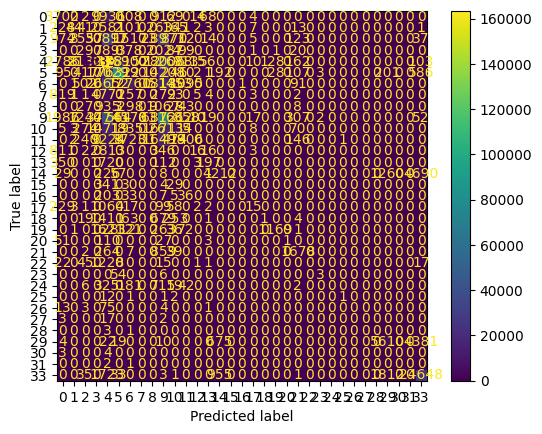

In [107]:
# plot_confusion_matrix
dispT = ConfusionMatrixDisplay.from_estimator(
        xgbT,
        Xt_test,
        yt_test,
    )
dispT.confusion_matrix

In [108]:
print(classification_report(yt_test, xgbT_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.31      0.25      0.27     14815
           1       0.60      0.01      0.01      5823
           2       0.34      0.04      0.07     66006
           3       0.00      0.00      0.00      3428
           4       0.49      0.73      0.59    224945
           5       0.78      0.70      0.74    109466
           6       0.40      0.21      0.28     60756
           7       0.00      0.00      0.00      6228
           8       0.26      0.00      0.01      2418
           9       0.34      0.59      0.43    117375
          10       0.43      0.16      0.23     38779
          11       0.37      0.06      0.10     32223
          12       0.23      0.00      0.01      4007
          13       0.51      0.08      0.14      2382
          14       0.70      0.40      0.51     10483
          15       0.00      0.00      0.00       404
          16       0.00      0.00      0.00       284
          17       0.21    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SEVERITY**

array([[ 66491, 114501,  10137],
       [ 41945, 349814,  27204],
       [  2483,  88890,  54378]])

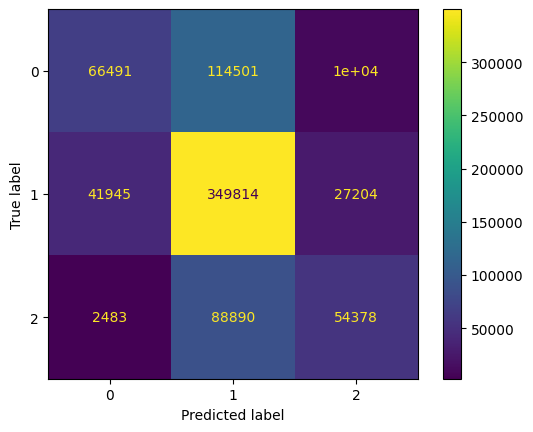

In [109]:
# plot_confusion_matrix
dispS = ConfusionMatrixDisplay.from_estimator(
        xgbS,
        Xs_test,
        ys_test,
    )
dispS.confusion_matrix

In [110]:
print(classification_report(ys_test, xgbS_pred))

              precision    recall  f1-score   support

           0       0.60      0.35      0.44    191129
           1       0.63      0.83      0.72    418963
           2       0.59      0.37      0.46    145751

    accuracy                           0.62    755843
   macro avg       0.61      0.52      0.54    755843
weighted avg       0.62      0.62      0.60    755843



**HOTSPOT**

array([[ 42225,      0,      0],
       [     0, 531355,      0],
       [     0,      0, 182263]])

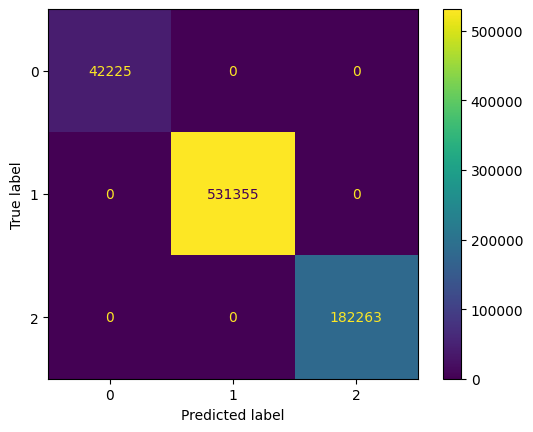

In [111]:
# plot_confusion_matrix
dispH = ConfusionMatrixDisplay.from_estimator(
        xgbH,
        Xh_test,
        yh_test,
    )
dispH.confusion_matrix

In [112]:
print(classification_report(yh_test, xgbH_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42225
           1       1.00      1.00      1.00    531355
           2       1.00      1.00      1.00    182263

    accuracy                           1.00    755843
   macro avg       1.00      1.00      1.00    755843
weighted avg       1.00      1.00      1.00    755843

